In [ ]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

# Dinâmica Newtoniana e Integradores

Sabemos que a 2ª Lei de Newton para um corpo qualquer é dade pela EDO de 2ª ordem na forma 

$$ m\frac{d^2\boldsymbol{r}}{d t^2} = \boldsymbol{F}_R $$

sendo $m$ a massa do corpo e $\boldsymbol{F}_R$ a força resultante que atua sobre o corpo.

# 1. Oscilador Harmônico Simples (OHS)
Nesse caso temos que 

$$\boldsymbol{F}_R = - k \boldsymbol{x}$$

levando em conta só o movimento em $x$ teremos que 

$$m\frac{d^2 x}{dt^2} = - k x$$


que pode ser quebrado em duas EDOs de 1ª ordem

$$\frac{d x}{dt} = v, \qquad \text{e} \qquad\frac{d v}{dt} = - \omega_0^2 x$$

definimos, usualmente, $\omega_0 = \sqrt{k/m}$.

Cuja solução analítica é 

$$ x(t) = x_0 \cos(\omega_0 t) + (v_0/\omega_0) \sin(\omega_0 t)$$


In [ ]:
# Função que retorna a solução analítica do OHS
def ohs_analitica(u0,ti,tf,h,args):
    t = np.arange(ti,tf,h)
    omega0 = args
    x0,v0 = u0
    return np.array([x0*np.cos(omega0*t)+(v0/omega0)*np.sin(omega0*t),-x0*omega0*np.sin(omega0*t) + v0*np.cos(omega0*t)]), t

## Método de Euler Explícito

Para qualquer sistema de EDOs de 1ª ordem temos que 

$$ \frac{d \boldsymbol{u}}{dt} = \boldsymbol{f}(t)$$

de modo que ao integrarmos de $t$ até $t+h$, teremos que 

$$\int_t^{t+h} \frac{d \boldsymbol{u}}{dt} dt = \boldsymbol{u}_{t+h} - \boldsymbol{u}_t = \int_t^{t+h} \boldsymbol{f}(t') dt' $$

E usando a aproximação de Euler, temos que $\int_t^{t+h} \boldsymbol{f}(t') dt' = \boldsymbol{f}_t h$

$$ \boldsymbol{u}_{t+h} = \boldsymbol{u}_t + \boldsymbol{f}_t h$$

In [ ]:
# Função geral que implementa o integrador de Euler para EDOs genéricas
def solver_Euler(u0,ti,tf,h,args,edo):
    ...
    return u,t

In [ ]:
# Função para definição da EDO do problema do OHS
def edo_ohs(u,t,args):
    ...
    return dudt

Condição Inicial:
- $x_0 = 1.0$
- $v_0 = 0.0$

In [ ]:
# Condição Inicial
x0 = ...
v0 = ...

# Array de condições iniciais
u0 = ...

$\omega_0 = 1.0$

In [ ]:
# Parâmetros necessários para a EDO
omega0 = ...

$ t= [0,30.0]$ com $h = 0.1$

In [ ]:
# Cria o array que armazena a solução numérica usando o método de Euler
sol_ohs_euler, t = ...

# Formato do output
# x(t) = sol_ohs_euler[0]
# v(t) = sol_ohs_euler[1]

In [ ]:
# Cria o array que armazena a solução analítica
sol_ohs_analitica, t_analitico = ...

In [ ]:
# Gráfico de x como função de t 


Energia do Oscilador 

$$ E = \frac{m v^2}{2} + \frac{k x^2}{2}$$

$$ 2 E /m = v^2 + \omega_0^2 x^2

In [ ]:
# Gráfico de E como função de t 

## Método de Runge-Kutta

Um método baseado em passos intermediários para cálculo da EDO. Seja a EDO 

$$\frac{d y}{d t} = f(y,t)$$

com condição inicial dada por $y(t_n) = y_n$, de modo que  

$$k_1 = f(y_n,t_n)$$
$$k_2 = f(y_n+\frac{h}{2}k_1, t_n + \frac{h}{2})$$
$$k_3 = f(y_n+\frac{h}{2}k_2, t_n + \frac{h}{2})$$
$$k_4 = f(y_n+h k_3, t_n + h)$$

com o passo final sendo 

$$y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$$

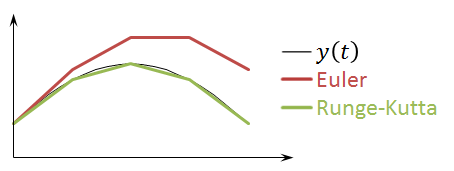

Ref: https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta

In [ ]:
def solver_RK4(u0,ti,tf,h,args,edo):
    ...
    return u, t

In [ ]:
# Resolvendo o problema para os instantes t
sol_ohs_rk4,_ = ...

In [ ]:
# Gráfico de x como função de t 

In [ ]:
# Gráfico de E como função de t 

## Método de Velocity Verlet

Apropriado apenas para 2ª Lei de Newton. Utiliza um cálculo a mais de aceleração. 

$$x_{t+h} = x_t + v_t h + \frac{1}{2} a_t h^2$$

$$v_{t+h} = v_t + \frac{1}{2}(a_{t+h}+a_t) h $$

De modo que o algoritmo consiste em 

1. Calcula $x_{t+h}$ usando $v_t$ e $a_t$;
2. Calcula $a_{t+h}$ usando $x_{t+h}$ e $v_t$, se necessário;
3. Calcula $v_{t+h}$ para o próximo passo;
4. Volta ao passo 1;

Ref: https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Verlet

In [ ]:
def solver_VelocityVerlet(u0,ti,tf,h,args,edo):
    ...
    return u,t

In [ ]:
# Resolvendo o problema para os instantes t
sol_ohs_vv,_ = ...

In [ ]:
# Gráfico de x como função de t 

In [ ]:
# Gráfico de E como função de t 

In [ ]:
# Gráfico de v como função de x (Espaço de Fase) 

In [ ]:
# Calculando o erro dependendo do passo de tempo h
harray = np.array([1e-4,0.001,0.01,0.1,1.0])
err = ...

for i in range(harray.size): 
    ...

In [ ]:
# Gráfico do erro como função do h
plt.yscale('log') # para escala logaritma no eixo 
plt.xscale('log')

plt.plot(...)


### Testando Performance

In [ ]:
%timeit -n 20 solver_Euler(...)

In [ ]:
%timeit -n 20 solver_RK4(...)

In [ ]:
%timeit -n 20 solver_VelocityVerlet(...)

# 2. Oscilador Harmônico Amortecido (OHA)

Uma EDO do tipo

$$ m\frac{d^2 x}{d t^2} = -b\frac{d x}{d t} - k x $$

que re-escrita fica como 

$$\frac{d x}{d t} = v \qquad \text{e} \qquad \frac{d v}{d t} = -\gamma v - \omega_0^2 x$$


In [ ]:
# Função para definição da EDO
def edo_oha(u,t,args):
    ...

Parâmetros
- $\gamma = 0.1$
- $\omega_0 = 1.0$


In [ ]:
# Define os parâmetros


Condição Inicial
- $x_0 = 2.0$
- $v_0 = 0.0$

In [ ]:
# Define as condições iniciais


Intervalo de Tempo

$t = [0,50.0]$ com $h = 0.01$

In [ ]:
sol_oha_vv_gamma0,t = ... # solução sem atrito
sol_oha_vv,t = ... # solução com atrito 

In [ ]:
# Gráfico de x como função de t

In [ ]:
# Gráfico de espaço de fase

## 3. Movimento de Projéteis

Para um projétil sendo lançado no ar, num ângulo $\theta$ em relação a horizontal, sob a ação da gravidade temos que a força resultante será

$$\boldsymbol{F}_R = m \boldsymbol{g} - b \boldsymbol{v}$$

Podemos escrever a 2ª Lei de Newton em 

$$ m\frac{d^2\boldsymbol{r}}{d t^2}  = m\boldsymbol{g} - b \boldsymbol{v}$$

em componentes fica 

$$ \frac{dx}{d t}  = v_x $$
$$ \frac{dy}{d t}  = v_y $$
$$ \frac{d v_x}{d t}  = - \frac{b}{m} v_x$$
$$ \frac{d v_y}{d t}  = -g - \frac{b}{m} v_y$$

Nesse caso, só conhecemos a solução analítica quando $b=0$ é dada por 

$$x = x_0 + (v_0 \cos{\theta}) t$$
$$ y = y_0 + (v_0 \sin{\theta}) t - \frac{g}{2} t^2$$

In [ ]:
# Função com solução analitica do movimento de projeteis em 2D
def projetil_analitico(u0,ti,tf,h,args):
    t = np.arange(ti,tf,h)
    b, g = args
    x0,y0,vx,vy = u0
    return np.array([x0+vx*t,y0+vy*t-0.5*g*t**2]),t

In [ ]:
# Função que define o sistema de EDOs do projetil para usar em um solver
def edo_projetil(u,t,args):
    ...
    return dudt

Parâmetros do modelo
- $b/m = 0.1$
- $g= 9.81$

In [ ]:
# Parâmetros do modelo


Condição Inicial
- $\theta = \pi/4$
- $v_0 = 10.0$

In [ ]:
# Condição Inicial

In [ ]:
# Resolvendo numericamente (caso b = 0.1)
sol_ode,t = ...

# Resolvendo numericamente (caso b = 0.0)
sol_ode_b0,t = ...

# Solução analítica (caso b = 0.0)
sol_ana, _ = ...

In [ ]:
# Gráfico de y como função de x

## 4. Movimento Planetário

Considere um planeta de massa $m$ em torno do Sol de massa $M$, cuja dinâmica é dada pela Lei da Gravitação de Newton na forma 

$$ m \frac{d^2 \boldsymbol{r}}{d t^2} = - \frac{G M m}{r^2}\boldsymbol{\hat{r}} $$

tal que 

$$\frac{d^2 x}{d t^2} = - \frac{G M}{r^3}x, \qquad \frac{d^2 y}{d t^2} = - \frac{G M}{r^3}y$$

Ref: https://pt.wikipedia.org/wiki/Lei_da_gravita%C3%A7%C3%A3o_universal

In [ ]:
def edo_planeta(u,t,args):
    ...
    return dudt

Parâmetros do Modelo
- $G = 1$
- $M = 1$

In [ ]:
# parametro do modelo (unidades astronomicas)


Condição Inicial
- $x_0 = 0.5$
- $y_0 = 0.0$
- $v_{0x} = 0.0$
- $v_{0y} = 1.63$

In [ ]:
# condição inicial


$t = [0,100]$ com $h = 0.1$

In [ ]:
# solução do problema 


In [ ]:
# Gráfico da órbita

Na teoria da relatividade Geral de Einstein conseguimos calcular a correção da gravitação para planetas que tem órbitas muito próximas do Sol, como Mercúrio, tal que 

$$ \frac{d^2 \boldsymbol{r}}{d t^2} = - \frac{G M}{r^2}\boldsymbol{\hat{r}} + \frac{\alpha M}{r^3}\boldsymbol{\hat{r}} $$

com $\alpha \ll 1 $. 

Ref: https://pt.wikipedia.org/wiki/Relatividade_geral

In [ ]:
def edo_planeta_GR(u,t,args):
    ...
    return dudt

Novo parâmetro 

$\alpha = 0.05$

In [ ]:
# Solução da EDO

In [ ]:
# Gráfico das órbitas

# Outras EDOs

Nossos integradores, como RK4, podem ser usados para resolver modelos baseados em EDOs genéricos. 

## 1. Atrator de Lorenz

É um modelo matemático simplificado para convecção atmosférica. Um sistema não-linear de EDOs acopladas dado por 

$$\frac{dx}{dt} = \sigma (y-x)$$

$$\frac{dy}{dt} = x (\rho-z) - y$$

$$\frac{dz}{dt} = x y - \beta z$$

com parâmetros $\sigma$, $\rho$ e $\beta$.

Ref: https://en.wikipedia.org/wiki/Lorenz_system


In [ ]:
# Função para definição da EDO
def edo_lorenz(u,t,args):
    ...

Condição inicial: 
- $x_0 = 0.0$
- $y_0 = 1.0$
- $z_0 = 1.05$

In [ ]:
# Condição Inicial


Parâmetros
- $\sigma = 10$
- $\rho = [13,14,15,28]$
- $\beta = 8/3$

Intervalo de tempo 

$t = [0,50]$ com $h = 0.01$

In [ ]:
sol_lorenz1, t = ...
sol_lorenz2, _ = ...
sol_lorenz3, _ = ...
sol_lorenz4, _ = ...

In [ ]:
# Gráfico de y como função de t

In [ ]:
# Gráfico de z como função de x

In [ ]:
# Biblioteca para gráfico 3D
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*sol_lorenz1,color='C0')
# ax.plot(*sol_lorenz2,color='C1')
# ax.plot(*sol_lorenz3,color='C2')
# ax.plot(*sol_lorenz4,color='C3')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Mudança da condição inicial
- $x_0, y_0, z_0 = [0, 1, 1.05]$
- $x_0, y_0, z_0 = [10^{-4}, 1, 1.05]$

In [ ]:
sol_lorenz_ic1, _ = ...
sol_lorenz_ic2, _ = ...

In [ ]:
# Gráfico 3D

## 2. Modelo SIR

Modelo de epidemiologia que envolve pessoas susceptíveis (S), pessoas infectadas (I) e pessoas recuperadas (R), cuja dinâmica é dada por 

$$\frac{d S}{d t} = -\frac{\beta}{N} I S, $$

$$ \frac{d I}{d t} = \frac{\beta}{N} I S - \gamma I, $$

$$ \frac{d R}{d t} = \gamma I, $$

Os parâmetros estão asssociados a 

- $\beta$: taxa de infecção 
- $\gamma$: taxa de recuperação

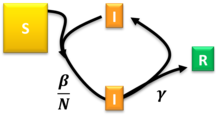

Ref: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

In [ ]:
# Função para definição da EDO
def edo_sir(u,t,args):
    ...

Parâmetros do modelo 
- $\beta = 0.5$ por dia 
- $\gamma = 0.05$ por dia 
- $N = 1000$ Nº total de habitantes

In [ ]:
# Definição dos parâmetros do modelo


Condição Inicial
- $S_0 = 999$
- $I_0 = 1$
- $R_0 = 0$

In [ ]:
# Condição Inicial

In [ ]:
# Resolvendo o problema para os instantes t


In [ ]:
# Gráfico das variáveis como função do tempo


$N = S + I + R$ sendo constante. 

In [ ]:
# Gráfico da soma como função do tempo

Novo parâmetro

$\beta = 0.2$

In [ ]:
# Resolvendo o problema para os instantes t

In [ ]:
# Gráfico das variáveis como função do tempo (para os dois valores de beta)

In [ ]:
# Gráfico de I_t como função de R_t